TRAIN__centered__10000__gradients_singular_values__20240320-122854.npy
index_90_percentile: 1606
intersect_idx: 64
VALIDATION__centered__10000__gradients_singular_values__20240320-122854.npy
index_90_percentile: 1606
intersect_idx: 14


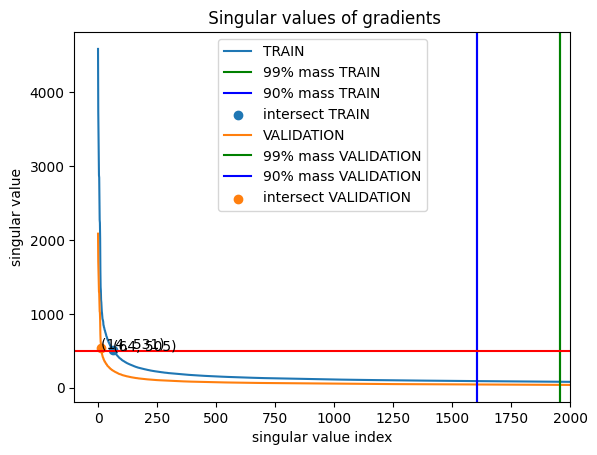

In [26]:
import numpy as np 
import matplotlib.pyplot as plt
from pathlib import Path
GRADIENTS_DIR = Path("/Users/roy/data/unlearning/gradients/gradients")
# get npy files from the directory
dataset_type = "VALIDATION"
intersect_pt = 500
def load_npy(file):
    return np.load(file)

for dataset_type in ["TRAIN", "VALIDATION"]:

    npy_files = sorted(list(GRADIENTS_DIR.glob(f"{dataset_type}*centered*10000*.npy")))
    npy_files


    npy_file = npy_files[-1]
    print(npy_file.name)
    grad_singular_values = np.array(load_npy(npy_file))

    grad_singular_values.shape
    # plot the singular values
    plt.plot(grad_singular_values.T, label = f"{dataset_type}")
    # find intersection with intersect pt
    intersect_idx = np.where(grad_singular_values > intersect_pt)[0][-1]
    total_mass = np.sum(grad_singular_values)
    # 
    index_90_percentile = np.where(np.cumsum(grad_singular_values) > 0.9*total_mass)[0][0]
    print(f"index_90_percentile: {index_90_percentile}")
    index_99_percentile = np.where(np.cumsum(grad_singular_values) > 0.99*total_mass)[0][0]
    # plot vert line at 99
    plt.axvline(x=index_99_percentile, color='g', linestyle='-', label = f"99% mass {dataset_type}")
    plt.axvline(x=index_90_percentile, color='b', linestyle='-', label = f"90% mass {dataset_type}")

    print(f"intersect_idx: {intersect_idx}")
    plt.scatter(intersect_idx, grad_singular_values[intersect_idx], label = f"intersect {dataset_type}")
    # text

    plt.text(intersect_idx, grad_singular_values[intersect_idx], f"({intersect_idx}, {round(grad_singular_values[intersect_idx])})")
    plt.xlabel("singular value index")
    plt.ylabel("singular value")
    plt.xlim(-100,2000)
plt.title(f" Singular values of gradients")
plt.legend()
# plot y = 500
plt.axhline(y=500, color='r', linestyle='-')
# ylog scale
#plt.yscale("log")
plt.show()


In [8]:
import numpy as np

def generate_low_dimensional_data(n_samples, intrinsic_dim, high_dim, noise_level=0.1):
    """
    Generate low-dimensional data embedded in a high-dimensional space.
    
    Parameters:
    - n_samples: int, number of samples to generate.
    - intrinsic_dim: int, the intrinsic (true) dimensionality of the data.
    - high_dim: int, the dimensionality of the space in which the data is embedded.
    - noise_level: float, standard deviation of the Gaussian noise added to the data.
    
    Returns:
    - data: numpy.ndarray, shape (n_samples, high_dim), the generated dataset.
    """
    
    if intrinsic_dim > high_dim:
        raise ValueError("Intrinsic dimensionality must be less or equal to the high dimensionality.")
    
    # Generate low-dimensional data
    low_dim_data = np.random.randn(n_samples, intrinsic_dim)
    
    # Create a random orthogonal matrix to project the low-dimensional data into the high-dimensional space
    random_matrix = np.random.randn(high_dim, intrinsic_dim)
    q, _ = np.linalg.qr(random_matrix)  # Use QR decomposition to orthogonalize
    
    # Project the low-dimensional data into the high-dimensional space
    high_dim_data = np.dot(low_dim_data, q.T)
    
    # Add Gaussian noise
    noise = np.random.normal(0, noise_level, size=(n_samples, high_dim))
    data = high_dim_data + noise
    
    return data

# Example usage
n_samples = 5_00
intrinsic_dim = 100
high_dim = 100_000

data = generate_low_dimensional_data(n_samples, intrinsic_dim, high_dim)
print(f"Generated data shape: {data.shape}")


Generated data shape: (500, 100000)


In [9]:

from sklearn.decomposition import PCA
from gensim.models import LsiModel
from scipy.sparse.linalg import svds as scipy_sparse_svds
from sklearn.utils.extmath import randomized_svd
#model = LsiModel(common_corpus, id2word=common_dictionary)

iteration = 1
iteration = 5
iteration = 10
iteration = 20


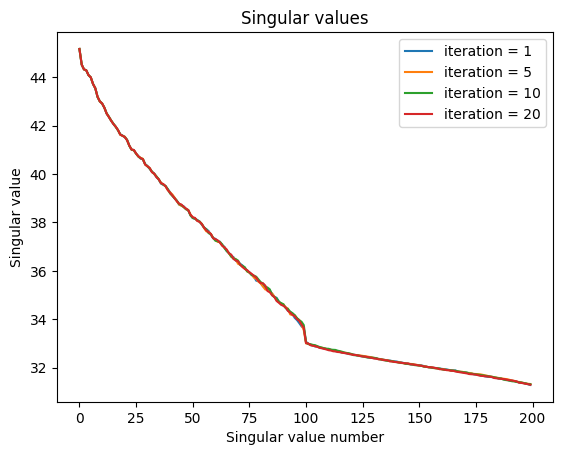

In [12]:
# randomized SVD
k = 200
iterations = [1,5, 20]
for iteration in iterations:
    print(f'iteration = {iteration}')
    U, Sigma, VT = randomized_svd(data, n_components=k, n_iter=5, random_state=None)

    # plot sigmas
    plt.plot(Sigma, label = f'iteration = {iteration}')
    plt.xlabel('Singular value number')
    plt.ylabel('Singular value')
    plt.title('Singular values')
plt.legend()
plt.show()


In [ ]:
# todo 
# 1. try getting the model size for the dictionary